$$
M_a = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

--2024-05-05 17:18:11--  https://mrzgardini.github.io/writings/documenti/030320241722.csv
Resolving mrzgardini.github.io (mrzgardini.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to mrzgardini.github.io (mrzgardini.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206602 (202K) [text/csv]
Saving to: ‘030320241722.csv.11’

     0K .......... .......... .......... .......... .......... 24%  853K 0s
    50K .......... .......... .......... .......... .......... 49% 1.74M 0s
   100K .......... .......... .......... .......... .......... 74% 2.86M 0s
   150K .......... .......... .......... .......... .......... 99% 5.90M 0s
   200K .                                                     100% 3.28T=0.1s

2024-05-05 17:18:12 (1.76 MB/s) - ‘030320241722.csv.11’ saved [206602/206602]



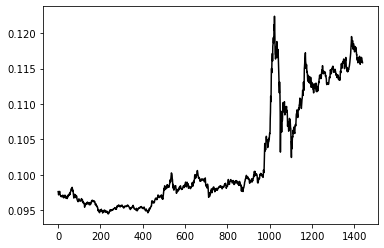

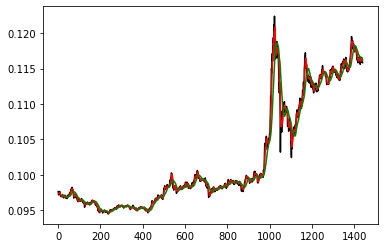

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4.24916
4.27626


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import talib

os.system('wget https://mrzgardini.github.io/writings/documenti/030320241722.csv') # DOGEUSDT 1m 28-02-2024

df = pd.read_csv(r'030320241722.csv')

for x in range(0, 6):
    df.drop(df.columns[6], axis = 1, inplace = True)
    
df.rename(columns={df.columns[0]: 'data'}, inplace = True)
df.rename(columns={df.columns[1]: 'open'}, inplace = True)
df.rename(columns={df.columns[2]: 'high'}, inplace = True)
df.rename(columns={df.columns[3]: 'low'}, inplace = True)
df.rename(columns={df.columns[4]: 'close'}, inplace = True)
df.rename(columns={df.columns[5]: 'volume'}, inplace = True)

plt.plot(df['close'], color = 'black')
plt.show()

#df['sma1'] = talib.SMA(df.close, timeperiod = 5)
#df['sma2'] = talib.SMA(df.close, timeperiod = 21)
df["x"]=df["close"].rolling(window=5, min_periods=5).mean()
df["y"]=df["close"].rolling(window=21, min_periods=21).mean()

plt.plot(df['close'], color = 'black')
plt.plot(df['x'], color = 'r')
plt.plot(df['y'], color = 'g')
plt.show()

df['op'] = 0

for x in range(len(df)):
    if df['x'].loc[x] > df['y'].loc[x]:
        if x == 0:
            y = x
        if x > 0:
            y = x - 1
            if df['x'].loc[y] <= df['y'].loc[y]:
                df['op'].loc[x] = 'BUY'
    if df['x'].loc[x] <= df['y'].loc[x]:
        if x == 0:
            y = x
        if x > 0:
            y = x - 1
            if df['x'].loc[y] > df['y'].loc[y]:
                df['op'].loc[x] = 'SELL'

df['w'] = 0

for x in range(len(df)):
    if df['op'].loc[x] == 'BUY':
        df['w'].loc[x] = df['close'].loc[x]

df['z'] = 0

for x in range(len(df)):
    if df['op'].loc[x] == 'SELL':
        df['z'].loc[x] = df['close'].loc[x]

comprato = df['w'].sum()
venduto = df['z'].sum()

print(comprato)
print(venduto)